In [1]:
import os
from progressbar import ProgressBar
from algorithm.algorithms import * 
from bandit_process.arm_generator import *

No switching cost

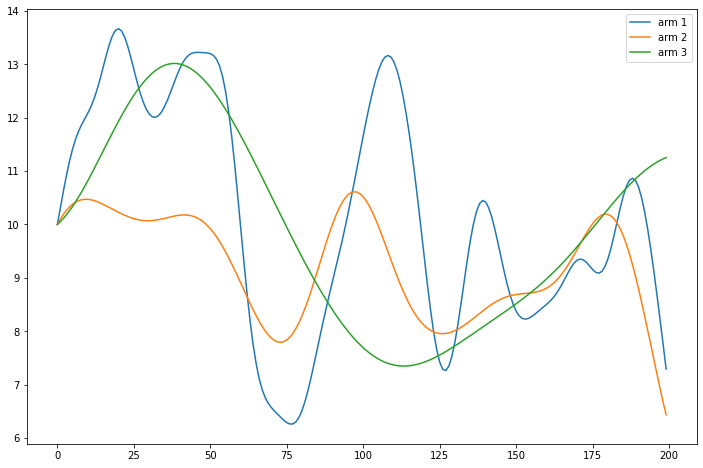

In [3]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)+10  #generate three arms
arm2=expect_reward_generator(200,lengthscale=16,variance=5,Smooth=True,Plot=False)+10
arm3=expect_reward_generator(200,lengthscale=32,variance=5,Smooth=True,Plot=False)+10

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [10]:
N = 100
T = 200

EF_record=[]
UCB_record=[]
GPR_record=[]
GPR_mismatch_record=[]

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):

  arm1=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
  arm2=expect_reward_generator(T,lengthscale=20,variance=5,Smooth=True,Plot=False)
  arm3=expect_reward_generator(T,lengthscale=40,variance=5,Smooth=True,Plot=False)

  max_reward = np.maximum.reduce([arm1,arm2,arm3])
  C=np.sum(np.abs(np.maximum.reduce([arm1,arm2,arm3])))

  regret_holder_EF=EF(T, arm1,arm2,arm3)/C
  regret_holder_UCB= UCB_f(T, arm1,arm2,arm3)/C
  regret_holder_GPR_mismatch,_= GPR_fit(T, 'Matern52',0, arm1,arm2,arm3)/C

  EF_record.append(regret_holder_EF)
  UCB_record.append(regret_holder_UCB)
  GPR_mismatch_record.append(regret_holder_GPR_mismatch)

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [11]:
EF_record=np.array(EF_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_mismatch_record=np.array(GPR_mismatch_record).reshape(N,T)

# np.savetxt('EF_record.csv', EF_record, delimiter=',')
# np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
# np.savetxt('GPR_mismatch_record.csv', GPR_mismatch_record, delimiter=',')

In [12]:
EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_mismatch_cumsum=np.cumsum(GPR_mismatch_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_mismatch_average=np.mean(GPR_mismatch_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_mismatch_cumsum_std=np.sqrt(np.var(GPR_mismatch_cumsum,axis=0))/math.sqrt(N)

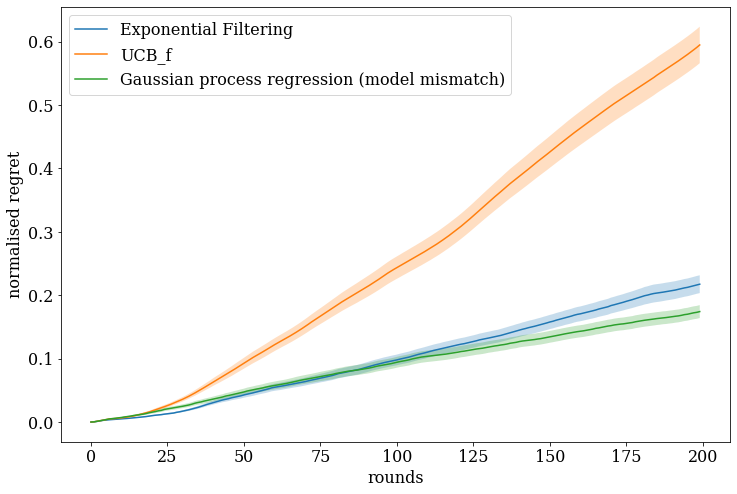

In [13]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(EF_cumsum_average,label='Exponential Filtering')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, alpha=0.25)

plt.plot(UCB_cumsum_average,label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std, alpha=0.25)

plt.plot(GPR_cumsum_mismatch_average,label='Gaussian process regression (model mismatch)')
plt.fill_between(range(T), GPR_cumsum_mismatch_average-GPR_mismatch_cumsum_std, GPR_cumsum_mismatch_average+GPR_mismatch_cumsum_std, alpha=0.25)


plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Experiment 2 

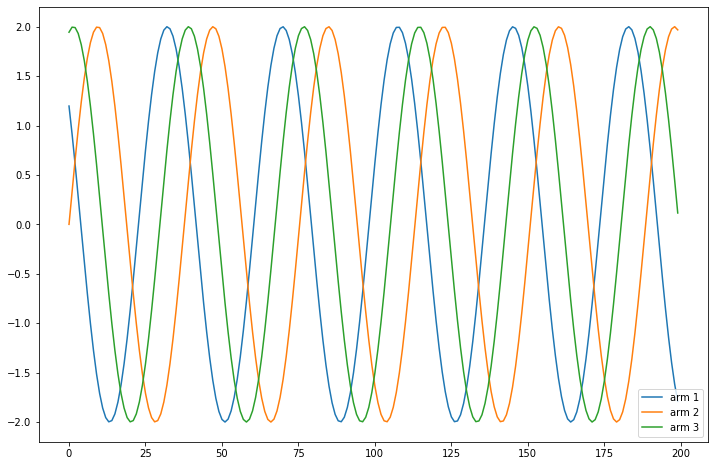

In [4]:
arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,8,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.plot(arm3,label='arm 3')
plt.legend()

In [25]:
EF_record=[]
UCB_record=[]
GPR_record=[]


arm1 = expect_reward_generato_sin(200,6,2,15,Plot=False)
arm2 = expect_reward_generato_sin(200,6,2,0,Plot=False)
arm3 = expect_reward_generato_sin(200,6,2,4,Plot=False)

arms=[arm1,arm2,arm3]
max_reward = np.maximum.reduce(arms)
C=np.sum(np.abs(np.maximum.reduce(arms)))

N = 100
T = 200

pbar = ProgressBar() #showing the progress of the code

for exp in pbar(range(N)):
    
    regret_holder_EF=EF(arms)/C
    regret_holder_UCB= UCB_f(arms)/C
    regret_holder_GPR= GPR_fit(arms,'Matern52')/C


    EF_record.append(regret_holder_EF)
    UCB_record.append(regret_holder_UCB)
    GPR_record.append(regret_holder_GPR)
   


 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|


In [26]:
EF_record=np.array(EF_record).reshape(N,T)
UCB_record=np.array(UCB_record).reshape(N,T)
GPR_record=np.array(GPR_record).reshape(N,T)

#np.savetxt('EF_record.csv', EF_record, delimiter=',')
#np.savetxt('UCB_record.csv', UCB_record, delimiter=',')
#np.savetxt('GPR_record.csv', GPR_record, delimiter=',')


In [27]:
EF_cumsum=np.cumsum(EF_record,axis=1)
UCB_cumsum=np.cumsum(UCB_record,axis=1)
GPR_cumsum=np.cumsum(GPR_record,axis=1)


EF_cumsum_average=np.mean(EF_cumsum,axis=0)
UCB_cumsum_average=np.mean(UCB_cumsum,axis=0)
GPR_cumsum_average=np.mean(GPR_cumsum,axis=0)

EF_cumsum_std=np.sqrt(np.var(EF_cumsum,axis=0))/math.sqrt(N)
UCB_cumsum_std=np.sqrt(np.var(UCB_cumsum,axis=0))/math.sqrt(N)
GPR_cumsum_std=np.sqrt(np.var(GPR_cumsum,axis=0))/math.sqrt(N)

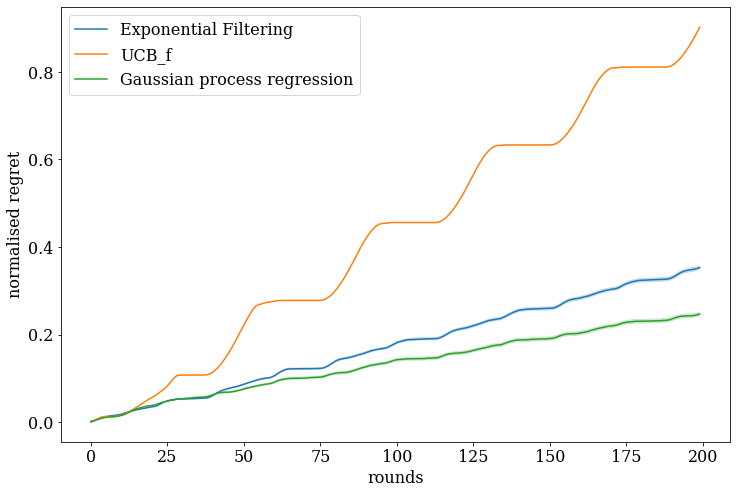

In [28]:
plt.rcParams['font.size'] = '16'
plt.rc('font', family='serif')
plt.figure(figsize=(12, 8))

plt.plot(EF_cumsum_average,label='Exponential Filtering')
plt.fill_between(range(T), EF_cumsum_average-EF_cumsum_std, EF_cumsum_average+EF_cumsum_std, alpha=0.25)

plt.plot(UCB_cumsum_average,label='UCB_f')
plt.fill_between(range(T), UCB_cumsum_average-UCB_cumsum_std, UCB_cumsum_average+UCB_cumsum_std, alpha=0.25)

plt.plot(GPR_cumsum_average,label='Gaussian process regression')
plt.fill_between(range(T), GPR_cumsum_average-GPR_cumsum_std, GPR_cumsum_average+GPR_cumsum_std, alpha=0.25)



plt.xlabel('rounds',fontsize=16)
plt.ylabel('normalised regret',fontsize=16)
plt.legend()

Switching cost is non-negative

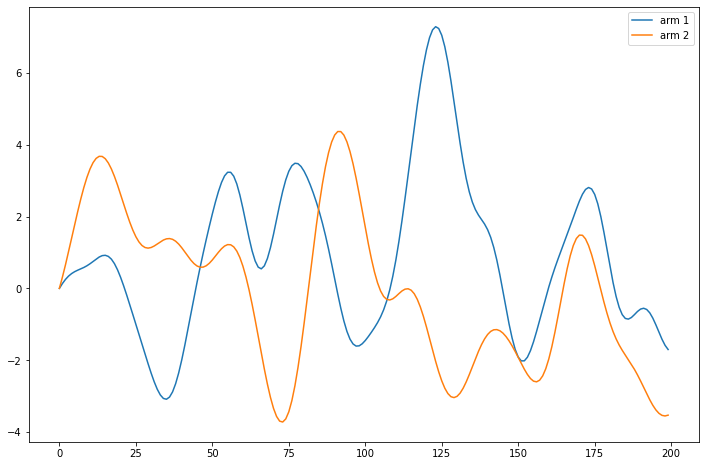

In [4]:
arm1=expect_reward_generator(200,lengthscale=8,variance=5,Smooth=True,Plot=False)
arm2=expect_reward_generator(200,lengthscale=10,variance=5,Smooth=True,Plot=False)

plt.figure(figsize=(12, 8))
plt.plot(arm1,label='arm 1')
plt.plot(arm2,label='arm 2')
plt.legend()

In [ ]:
C_holder = [0, 0.75, 1.5, 5 ]

In [7]:
for C in C_holder:
  
  regret_normal = []
  regret_dp = []
  regret_mean = []

  C = 0.25
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    regret_holder1,choice1=GPR_fit(T, 'RBF',C,arm1,arm2)
    regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2, TS= True)
    regret_holder3,choice3,models=GPR_DP(T,C, 0, arm1,arm2, TS= False)
    

    regret_normal.append(regret_holder1/Normal)
    regret_dp.append(regret_holder2/Normal)
    regret_mean.append(regret_holder3/Normal)
    

  regret_record1 = np.array(regret_normal).reshape(N,T)
  regret_record2 = np.array(regret_dp).reshape(N,T)
  regret_record3 = np.array(regret_mean).reshape(N,T)

  np.savetxt('result/noraml_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('result/DP_cost'+str(C)+'.csv', regret_record1, delimiter=',')
  np.savetxt('result/mean_cost'+str(C)+'.csv', regret_record1, delimiter=',')


100% |########################################################################|


Experiment with discount factor

In [3]:
discount_factor_holder=[1., 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.]

In [4]:
for df in discount_factor_holder:
  
  regret_normal = []
  regret_dp = []

  switch_normal = []
  switch_dp = []

  C = 10
  N = 250

  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=10,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))


    regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2, discount_factor=df,TS=False)
    regret_dp.append(regret_holder2/Normal)
    
    
  regret_record2=np.array(regret_dp).reshape(N,T)
  regret_cumsum2=np.cumsum(regret_record2,axis=1)
  cumsum_average2=np.mean(regret_cumsum2,axis=0)
  cumsum_std2=np.sqrt(np.var(regret_cumsum2,axis=0))/math.sqrt(N)


  np.savetxt('result/mean_DP_cost10_discount_'+str(df)+'.csv', regret_record2, delimiter=',')

 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |#############################################

Robust or not?

In [8]:
C_holder = [0, 0.25, 0.75, 1.5, 5, 7.5, 10]

In [10]:
for C in C_holder:
  
  choice_holder1 = []
  choice_holder2 = []
  choice_holder3 = []
  
  N = 250


  pbar = ProgressBar() #showing the progress of the code

  for exp in pbar(range(N)):

    T=200

    arm1=expect_reward_generator(T,lengthscale=8,variance=5,Smooth=True,Plot=False)
    arm2=expect_reward_generator(T,lengthscale=16,variance=5,Smooth=True,Plot=False)
    
    Normal = np.sum(np.abs(np.maximum.reduce([arm1,arm2])))

    #regret_holder1,choice1,models=GPR_DP(T,C, 0, arm1,arm2,TS=True)
    #regret_holder2,choice2,models=GPR_DP(T,C, 0, arm1,arm2,TS=False)
    regret_holder3,choice3 = GPR_fit(T, 'Matern52', C, arm1, arm2)
    
    #choice_holder1.append(choice1)
    #choice_holder2.append(choice2)
    choice_holder3.append(choice3)
  
  
    
  #choice_record1 = np.array(choice_holder1).reshape(N,T)  
  #choice_record2 = np.array(choice_holder2).reshape(N,T)  
  choice_record3 = np.array(choice_holder3).reshape(N,T)  
    
  #np.savetxt('DPTS_cost'+str(C)+'.csv', choice_record1, delimiter=',')
  #np.savetxt('DPPM_cost'+str(C)+'.csv', choice_record2, delimiter=',')
  np.savetxt('GPRTS_cost'+str(C)+'.csv', choice_record3, delimiter=',')
  


 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:overflow encountered in square
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:invalid value encountered in multiply
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /home/hanyang/anaconda3/lib/python3.9/site-packages/GPy/kern/src/stationary.py:581: RuntimeWarning:overflow encountered in multiply
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################

In [11]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'GPRTS_cost'+str(C)+'.csv'), delimiter=',')
    #regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    print(np.sum(regret_record1)/(N*T))
    #print(np.sum(regret_record2)/(N*T))

0.49348
0.49798
0.49928
0.50056
0.51488
0.52578
0.5238


In [6]:
for C in C_holder:
    
    regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'DPTS_cost'+str(C)+'.csv'), delimiter=',')
    #regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    print(np.sum(regret_record1)/(N*T))
    #print(np.sum(regret_record2)/(N*T))

0.49974
0.51428
0.50892
0.52242
0.51512
0.52408
0.5145


In [7]:
for C in C_holder:
    
    #regret_record1 = np.genfromtxt(os.path.join(os.getcwd(),'DPTS_cost'+str(C)+'.csv'), delimiter=',')
    regret_record2 = np.genfromtxt(os.path.join(os.getcwd(),'DPPM_cost'+str(C)+'.csv'), delimiter=',')
    
    #print(np.sum(regret_record1)/(N*T))
    print(np.sum(regret_record2)/(N*T))

0.54884
0.59186
0.57924
0.59394
0.67022
0.74384
0.81424
